In [40]:
import pandas as pd
import matplotlib.pyplot as plt


In [41]:
# Chargement des données
df = pd.read_excel("Onyria_reponses.xlsx", engine='openpyxl')

In [42]:
# Conversion de la colonne Horodateur en datetime
df['Horodateur'] = pd.to_datetime(df['Horodateur'], dayfirst=True, errors='coerce')

# Affichage pour vérification
df[['Horodateur']].head()

,Horodateur
0,2025-06-20 19:07:27
1,2025-06-20 19:11:10
2,2025-06-20 19:11:25
3,2025-06-20 19:34:43
4,2025-06-20 20:09:22


In [43]:
print(df.columns.tolist())


['Horodateur', 'Sexe', 'Tranche_age', 'Personnalité', 'Souvenir_rêves', 'Journal_reve_papier', 'Interet_pour_Onyria', 'Interet_app_reves_explications', 'Interet_reve_image', 'Interet_interpretation_reves', 'Augmentation_interet_interpretation_reves', 'Explication_augmentation_interet_interpretation_reves', 'Interet_Onyria_explications', 'Remarques_finales']


In [44]:
colonnes_categoriels = [
    'Sexe',
    'Tranche_age',
    'Personnalité',
    'Souvenir_rêves',
    'Journal_reve_papier',
    'Interet_pour_Onyria',
    'Interet_app_reves_explications',
    'Interet_reve_image',
    'Interet_interpretation_reves',
    'Augmentation_interet_interpretation_reves',
    'Interet_Onyria_explications'
]

for col in colonnes_categoriels:
    df[col] = df[col].astype('category')

for col in colonnes_categoriels:
    print(f"{col} → {df[col].cat.categories.tolist()}")



Sexe → ['Femme', 'Homme']
Tranche_age → ['18 – 24 ans', '25 – 34 ans', '35 – 44 ans']
Personnalité → ['Assez rationnel·le', 'Entre les deux', 'Plutôt cartésien·ne', 'Plutôt sensible à l’émotionnel / à l’introspection', 'Très tourné·e vers le monde intérieur, les émotions, les rêves']
Souvenir_rêves → ['Parfois', 'Très souvent']
Journal_reve_papier → ['Non', 'Oui']
Interet_pour_Onyria → ['Non, pas vraiment', 'Oui, tout à fait', 'Pourquoi pas / À tester']
Interet_app_reves_explications → ["C'est assez compliqué, le matin, dans la course vers le travail, de prendre le temps de bien noter son rêve (tous les détails, le ressenti, etc) donc je fini souvent par ne pas le faire du tout ", 'Je ne me suis jamais penché sur le sujet', 'Je trouve que les rêves sont quelque chose d’intéressants et amusants', 'J’aime regarder la signification de mes rêves, ou m’expliquer pourquoi j’ai pu rêver de telle ou telle chose ', 'J’aimerai avoir une image de mes rêves pour m’aider à mieux les comprendre, ils

In [45]:
df['Interet_pour_Onyria'] = df['Interet_pour_Onyria'].replace({
    'Oui, tout à fait': 'Oui',
    'Pourquoi pas / À tester': 'À tester',
    'Non, pas vraiment': 'Non'
})


/var/folders/c4/gwh8dn4x50x2lbs830bg6dkc0000gn/T/ipykernel_96784/3954182044.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Interet_pour_Onyria'] = df['Interet_pour_Onyria'].replace({


## Ne conserver que les personnes intéressées

In [46]:

df_interesses = df[df['Interet_pour_Onyria'].isin(['Oui', 'À tester'])]

### Personnalité

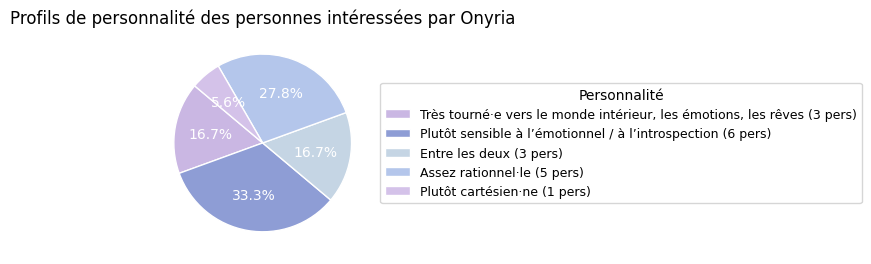

In [73]:
# Optionnel : ordre logique ou défini manuellement
ordre_personnalite = [
    "Très tourné·e vers le monde intérieur, les émotions, les rêves",
    "Plutôt sensible à l’émotionnel / à l’introspection",
    "Entre les deux",
    "Assez rationnel·le",
    "Plutôt cartésien·ne"
]

# Comptage chez les intéressés
counts_perso = df_interesses['Personnalité'].value_counts()
counts_perso = counts_perso.reindex(ordre_personnalite).dropna()
total_perso = counts_perso.sum()

# Palette mauve/bleu variée
colors = ['#cab7e3', '#8e9dd5', '#c5d5e4', '#b4c6eb', '#d4c2e9'][:len(counts_perso)]

# Création du camembert
plt.figure(figsize=(7, 6))
wedges, texts, autotexts = plt.pie(
    counts_perso,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops=dict(color="white", fontsize=10),
    wedgeprops={'edgecolor': 'white'}
)

# Légende avec nombre de personnes
labels_legende = [f"{label} ({int(count)} pers)" for label, count in zip(counts_perso.index, counts_perso.values)]
plt.legend(wedges, labels_legende, title="Personnalité", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9)

plt.title("Profils de personnalité des personnes intéressées par Onyria", fontsize=12)
plt.tight_layout()
plt.show()


### Parmi toutes les personnes qui ont répondu qu'elles avaient un intérêt pour Onyria (oui ou à tester - pas le non), analyser la part d'intérêt pour la fonctionnalité d'interprétation des rêves (Interet_interpretation_reves)

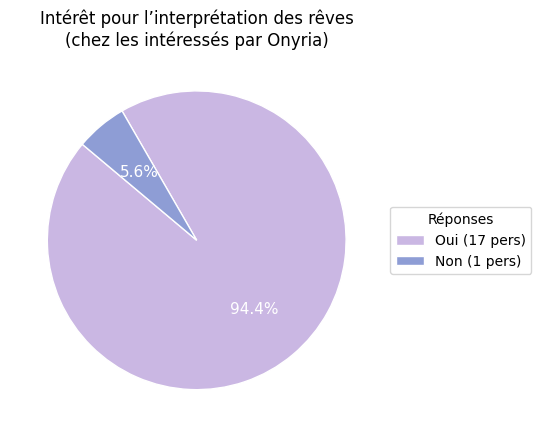

In [59]:
# Harmonisation (si ce n’est pas encore fait)
df['Interet_interpretation_reves'] = df['Interet_interpretation_reves'].replace({
    'Oui tout à fait': 'Oui',
    'Non pas du tout': 'Non'
})

# Filtrage
df_interesses = df[df['Interet_pour_Onyria'].isin(['Oui', 'À tester'])]

# Comptage
counts = df_interesses['Interet_interpretation_reves'].value_counts()
total = counts.sum()

# Couleurs mauve/bleu
colors = ['#cab7e3', '#8e9dd5']

# 📊 Création du camembert (plus petit, % seulement)
plt.figure(figsize=(5.5, 5.5))
wedges, texts, autotexts = plt.pie(
    counts,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops=dict(color="white", fontsize=11),
    wedgeprops={'edgecolor': 'white'}
)

# 🧾 Légende à droite avec nom + nombre de personnes
labels_legende = [f"{cat} ({count} pers)" for cat, count in zip(counts.index, counts.values)]
plt.legend(wedges, labels_legende, title="Réponses", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

plt.title("Intérêt pour l’interprétation des rêves\n(chez les intéressés par Onyria)", fontsize=12)
plt.tight_layout()
plt.show()


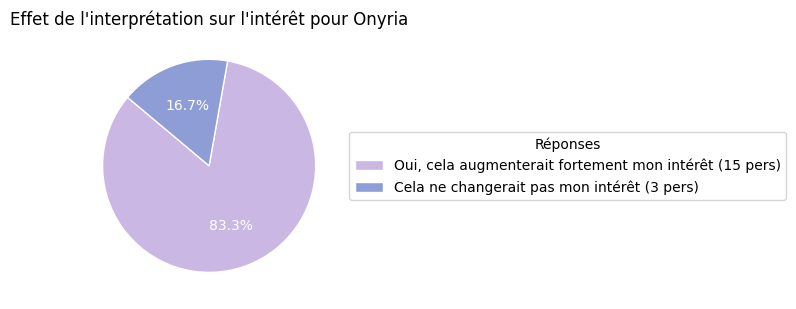

📌 Remarque : Aucun répondant intéressé par Onyria n’a déclaré que cela diminuerait son intérêt.


In [70]:
# Harmonisation (si pas encore fait)
df['Augmentation_interet_interpretation_reves'] = df['Augmentation_interet_interpretation_reves'].str.strip().replace({
    'oui, cela augmenterait fortement mon intérêt': 'Oui, cela augmenterait fortement mon intérêt',
    'cela ne changerait pas mon intérêt': 'Cela ne changerait pas mon intérêt',
    'non': 'Non'
})

# Comptage des modalités
counts_aug = df_interesses['Augmentation_interet_interpretation_reves'].value_counts()

# Couleurs mauve/bleu
colors = ['#cab7e3', '#8e9dd5', '#c5d5e4']

# Création du camembert (même taille que l’original)
plt.figure(figsize=(7, 6))
wedges, texts, autotexts = plt.pie(
    counts_aug,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops=dict(color="white"),
    wedgeprops={'edgecolor': 'white'}
)

# 🔁 Ajout de la légende à droite avec (n pers)
labels_legende = [f"{label} ({count} pers)" for label, count in zip(counts_aug.index, counts_aug.values)]
plt.legend(wedges, labels_legende, title="Réponses", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

# Affichage du graphique
plt.title("Effet de l'interprétation sur l'intérêt pour Onyria")
plt.tight_layout()
plt.show()

# Remarque explicative
print("📌 Remarque : Aucun répondant intéressé par Onyria n’a déclaré que cela diminuerait son intérêt.")



### Raisons pour lesquelles Onyria intéresse le plus ses utilisateurs

/var/folders/c4/gwh8dn4x50x2lbs830bg6dkc0000gn/T/ipykernel_96784/2681110650.py:26: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


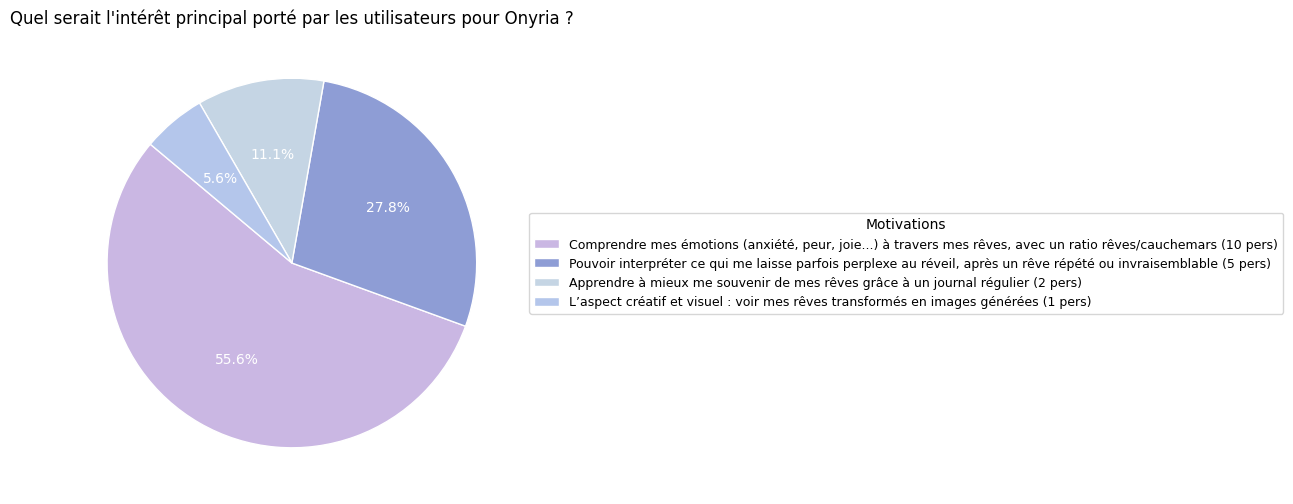

In [74]:
# Comptage sur les personnes intéressées
counts_explications = df_interesses['Interet_Onyria_explications'].value_counts()

# 💡 Supprimer les éventuelles catégories avec 0 réponses
counts_explications = counts_explications[counts_explications > 0]

# Couleurs mauve/bleu pastel (nombre ajusté dynamiquement)
colors = ['#cab7e3', '#8e9dd5', '#c5d5e4', '#b4c6eb', '#d4c2e9'][:len(counts_explications)]

# Création du camembert
plt.figure(figsize=(7, 6))
wedges, texts, autotexts = plt.pie(
    counts_explications,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops=dict(color="white", fontsize=10),
    wedgeprops={'edgecolor': 'white'}
)

# Légende avec nb de personnes uniquement pour les réponses existantes
labels_legende = [f"{label} ({count} pers)" for label, count in zip(counts_explications.index, counts_explications.values)]
plt.legend(wedges, labels_legende, title="Motivations", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9)

plt.title("Quel serait l'intérêt principal porté par les utilisateurs pour Onyria ?", fontsize=12)
plt.tight_layout()
plt.show()


### Intérêt pour la géneration de l'image

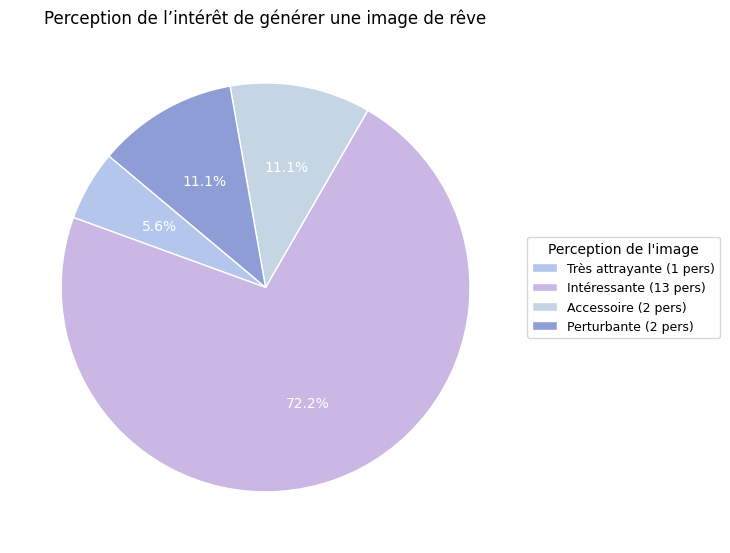

In [72]:
# Définir l’ordre voulu
ordre_categories = ["Très attrayante", "Intéressante", "Accessoire", "Perturbante"]

# Comptage des modalités (chez les intéressés uniquement)
counts_image = df_interesses['Interet_reve_image'].value_counts()

# Filtrer et réordonner selon la liste souhaitée
counts_image = counts_image.reindex(ordre_categories).dropna()
total_image = counts_image.sum()

# Couleurs pastel dans le même ordre
colors = ['#b4c6eb', '#cab7e3', '#c5d5e4', '#8e9dd5'][:len(counts_image)]

# Création du camembert
plt.figure(figsize=(7, 6))
wedges, texts, autotexts = plt.pie(
    counts_image,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops=dict(color="white", fontsize=10),
    wedgeprops={'edgecolor': 'white'}
)

# Légende avec le nombre de personnes (dans l’ordre personnalisé)
labels_legende = [f"{label} ({int(count)} pers)" for label, count in zip(counts_image.index, counts_image.values)]
plt.legend(wedges, labels_legende, title="Perception de l'image", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9)

plt.title("Perception de l’intérêt de générer une image de rêve", fontsize=12)
plt.tight_layout()
plt.show()
